## Boston House Price Prediction Project  
In this project we will work on developing an end to end machine learning project using linear regression. 
The project envolves:
- Gather data
- Data visualization
- Perform data feature engineering
- Data Transformation
- Predictions

### Importing libraries

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


%matplotlib inline

### Importing data

In [2]:
boston_dataset = load_boston() 

/home/vanemena/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

### Data exploration - raw data

In [3]:
type(boston_dataset)

sklearn.utils._bunch.Bunch

In [4]:
dir(boston_dataset)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print(boston_dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
type(boston_dataset.data)

numpy.ndarray

In [8]:
# Actual prices in thousands (000s) 
print(boston_dataset.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

### Data exploration with Pandas DataFrames

In [9]:
# Create a pandas dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Add column with the price (target)
data['PRICE'] = boston_dataset.target

In [10]:
print(data.shape)

(506, 14)


In [11]:
data.head() # Rows at the top

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [12]:
data.tail() # Rows at bottom

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [13]:
data.count() # show us the number of row

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

### Cleaning data - check for missing values

In [14]:
data.isnull().any() # shows if there is any null value

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Visualising Data - Histograms, Distributions and Bar Charts

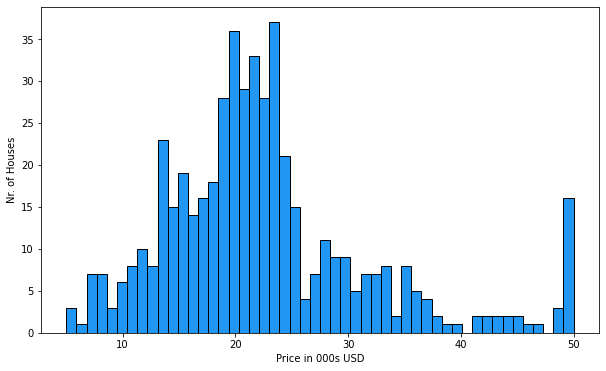

In [15]:
# Price vs Nr. of Houses
plt.figure(figsize=(10, 6))
plt.hist(data['PRICE'], bins=50, ec='black', color='#2196f3')
plt.xlabel('Price in 000s USD')
plt.ylabel('Nr. of Houses')
plt.show()

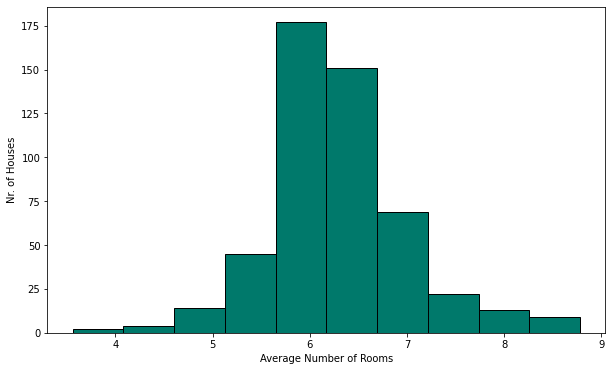

In [16]:
# Average Number of Rooms vs Nr. of Houses
plt.figure(figsize=(10, 6))
plt.hist(data['RM'], ec='black', color='#00796b')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Houses')
plt.show()

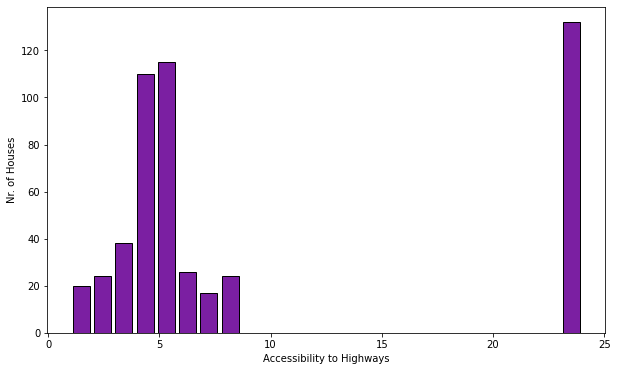

In [18]:
# Accessibility to Highways vs Nr. of Houses
plt.figure(figsize=(10, 6))
plt.hist(data['RAD'], bins=24, ec='black', color='#7b1fa2', rwidth=0.8)
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

In [17]:
data['RAD'].value_counts() # maybe we have an outlier at 24

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

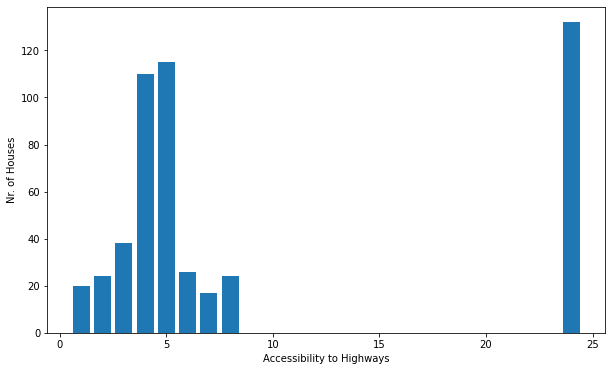

In [18]:
frequency = data['RAD'].value_counts()
#type(frequency)
#frequency.index
#frequency.axes[0]
plt.figure(figsize=(10, 6))
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.bar(frequency.index, height=frequency)
plt.show()

In [19]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

### Descriptive Statistics

In [22]:
data.describe() #  Generate descriptive statistics.

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

### Correlation

### $$ \rho _{XY} = corr(X,Y)$$
### $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [20]:
# Crorrelation between two features
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375616

In [21]:
data['PRICE'].corr(data['RM'])

0.6953599470715393

In [22]:
data.corr() # Pearson Correlation Coefficients

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [23]:
# Create a mask like data.corr. We will use it to make a heatmap
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

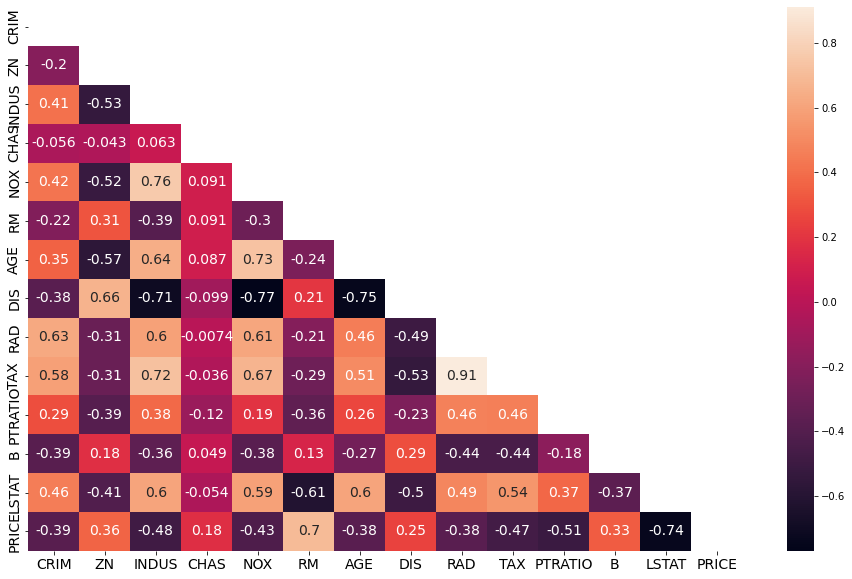

In [24]:
# Creating a heatmap
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### More data visualization
Feature relationship scatter plots

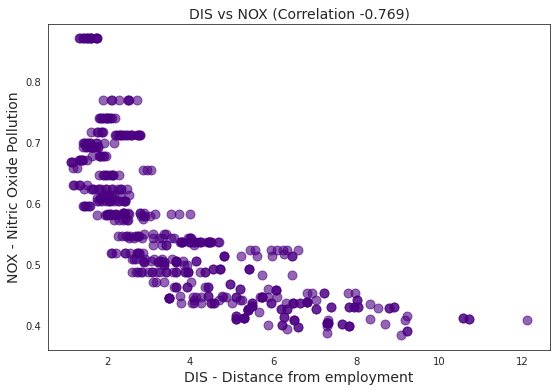

In [25]:
# Relationship between pollution and distance 
nox_dis_corr = round(data['NOX'].corr(data['DIS']), 3)

plt.figure(figsize=(9, 6))
plt.scatter(x=data['DIS'], y=data['NOX'], alpha=0.6, s=80, color='indigo')

plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=14)
plt.xlabel('DIS - Distance from employment', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)
plt.show()

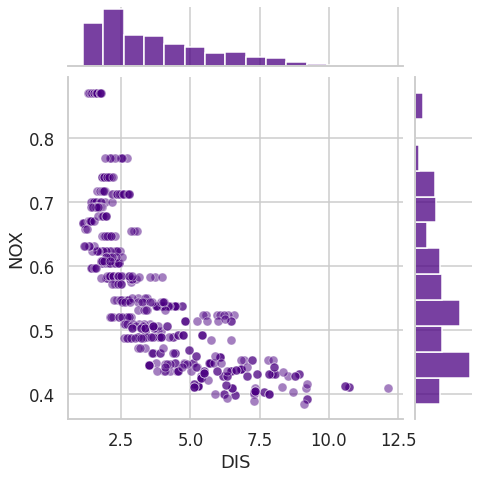

In [26]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], height=7, color='indigo', joint_kws={'alpha':0.5})
plt.show()

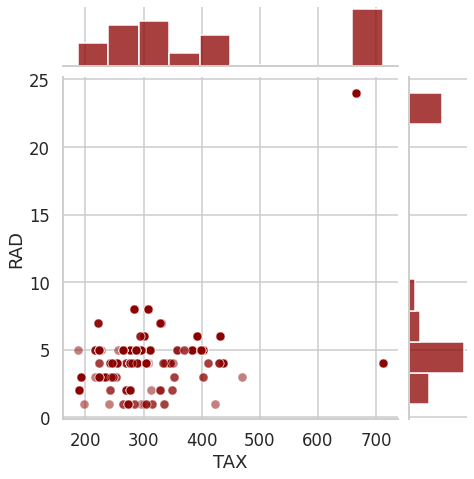

In [27]:
# Relationship between Property-Tax and Accessibility to Highways
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], height=7, color='darkred', joint_kws={'alpha':0.5})
plt.show()

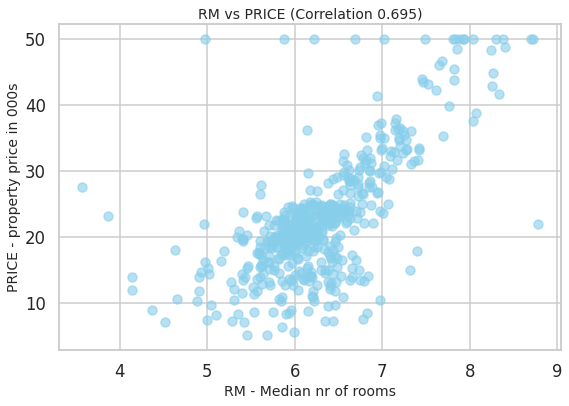

In [28]:
# Relationship between House Prices and the Number of Rooms

rm_tgt_corr = round(data['RM'].corr(data['PRICE']), 3)

plt.figure(figsize=(9, 6))
plt.scatter(x=data['RM'], y=data['PRICE'], alpha=0.6, s=80, color='skyblue')

plt.title(f'RM vs PRICE (Correlation {rm_tgt_corr})', fontsize=14)
plt.xlabel('RM - Median nr of rooms', fontsize=14)
plt.ylabel('PRICE - property price in 000s', fontsize=14)
plt.show()

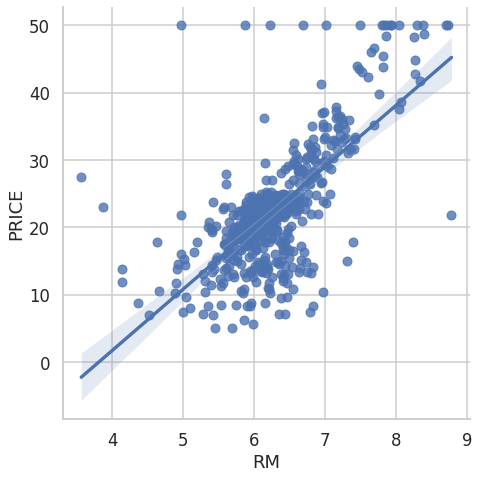

In [29]:
sns.lmplot(x='RM', y='PRICE', data=data, height=7)
plt.show()

Plotting pairwise relationships in the data set.

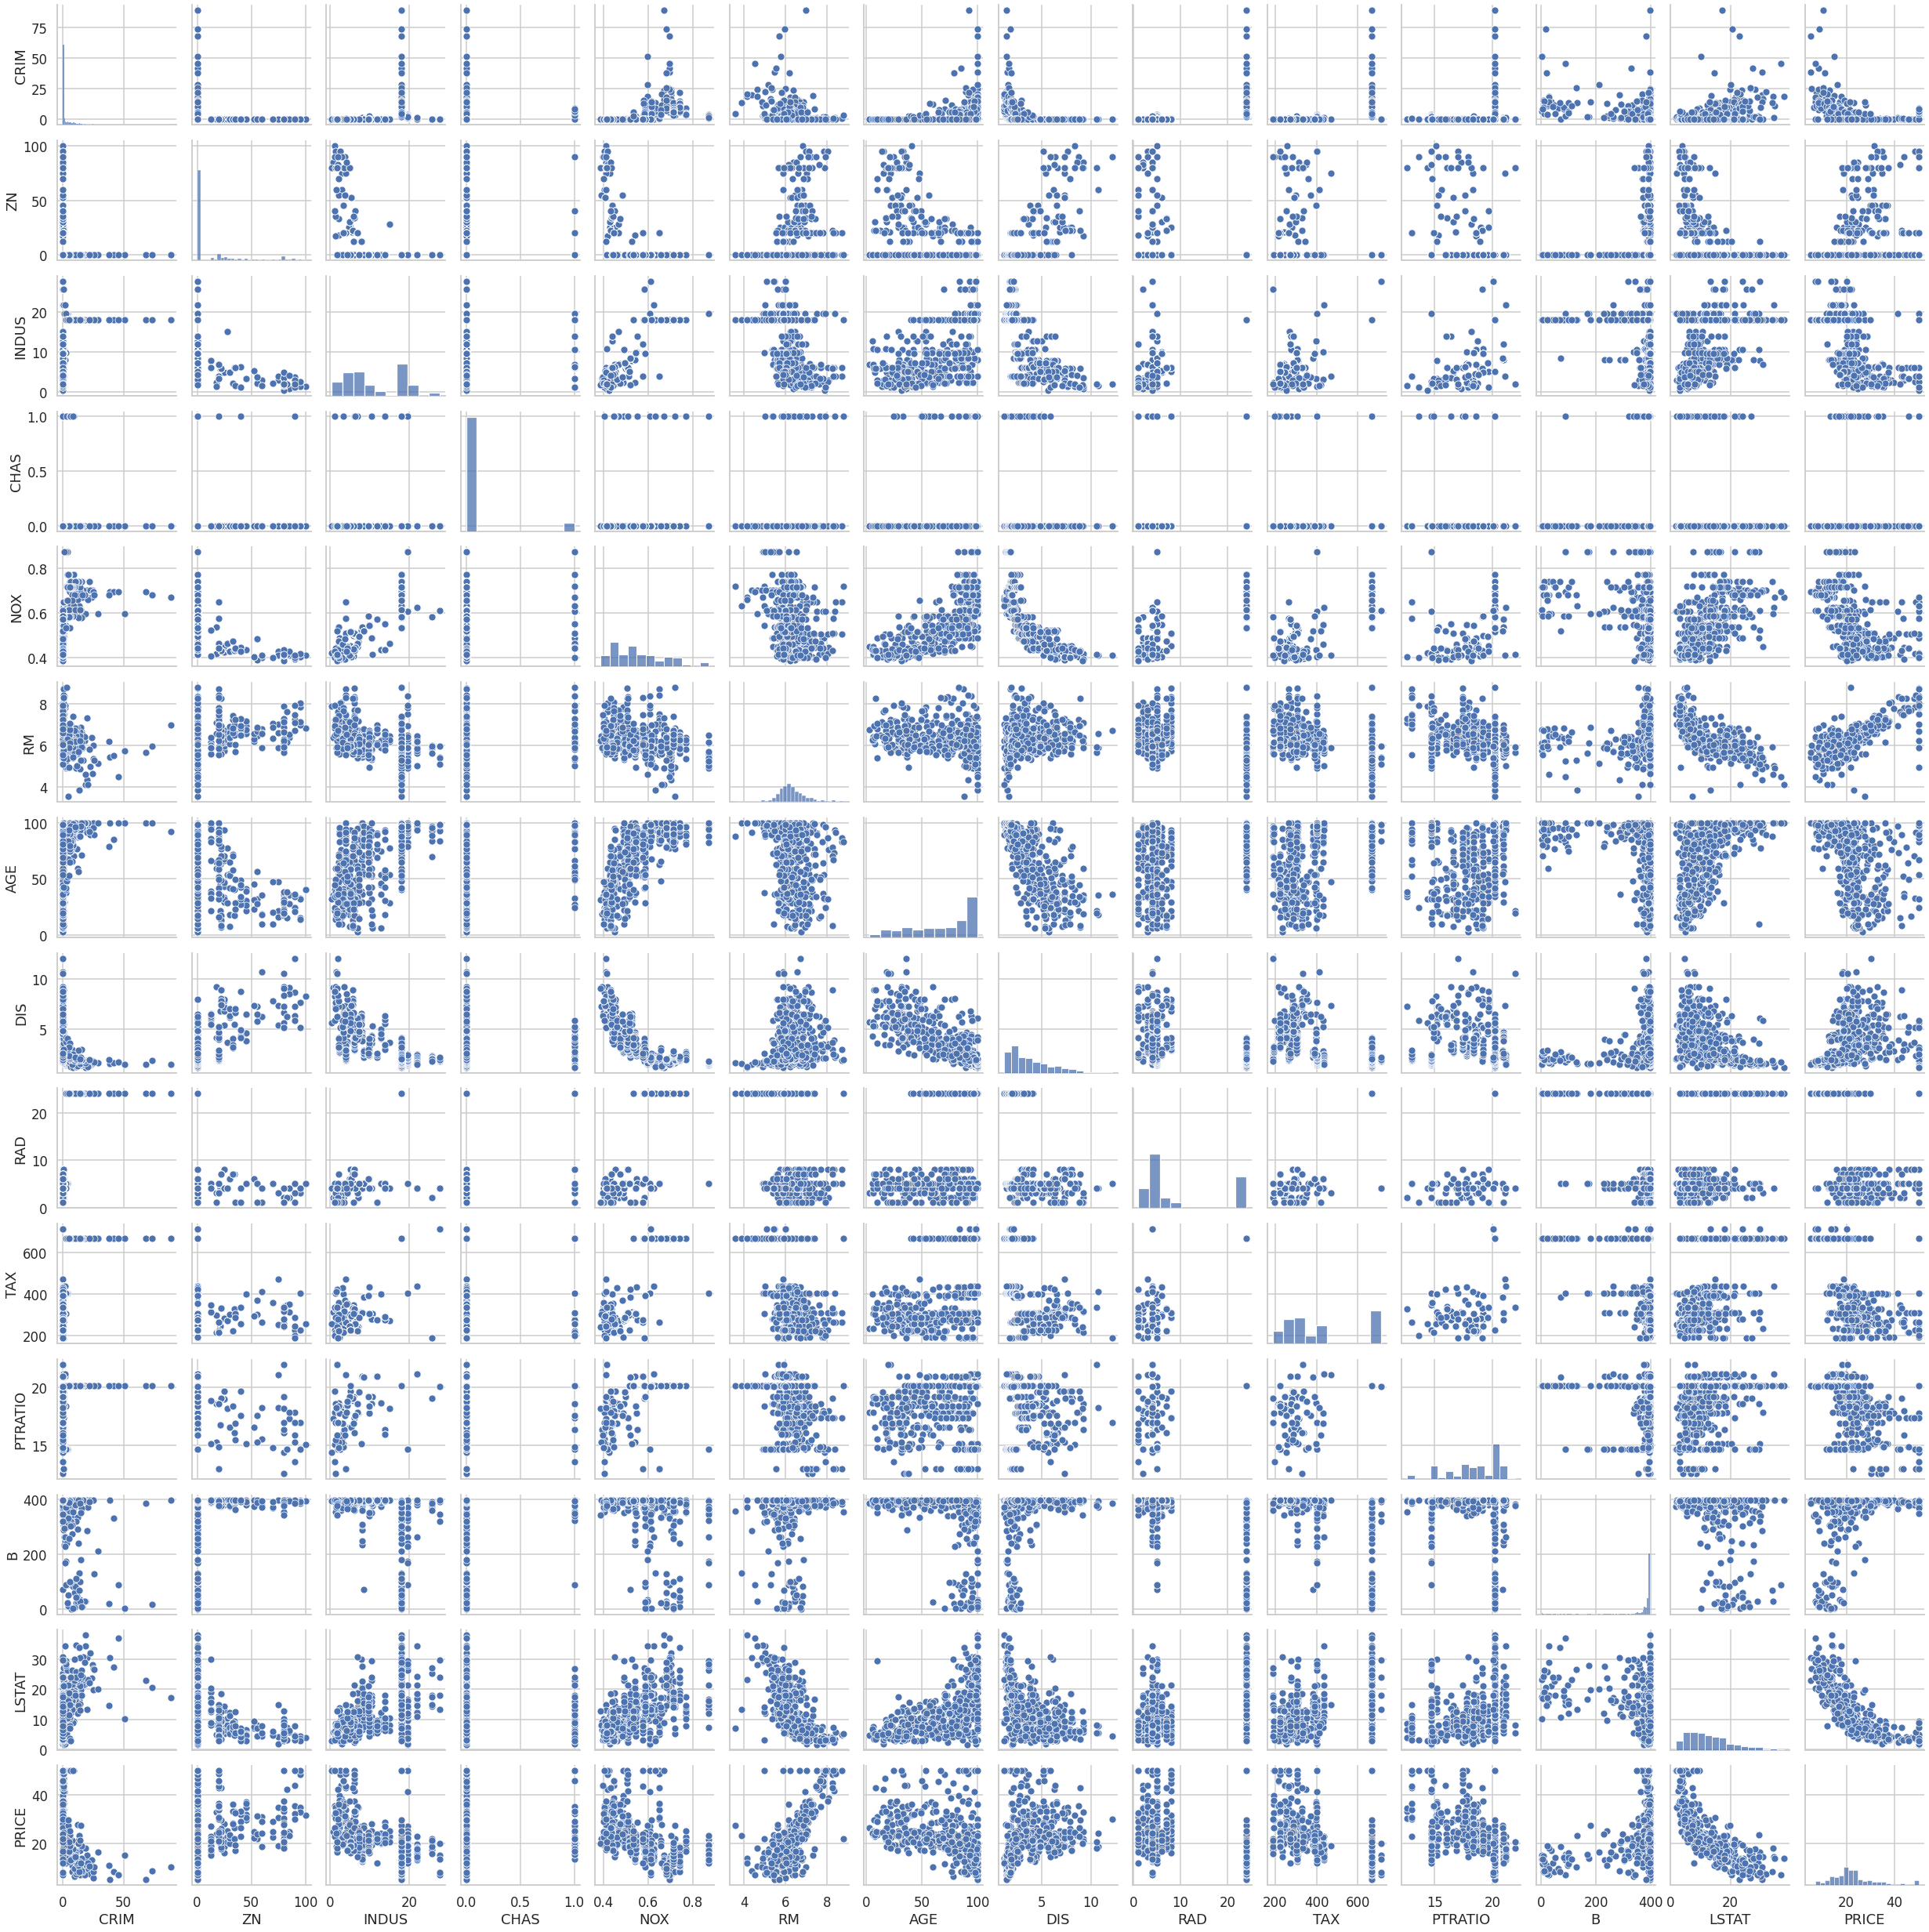

CPU times: user 20.8 s, sys: 516 ms, total: 21.3 s
Wall time: 20.8 s


In [30]:
%%time

sns.pairplot(data)
plt.show()

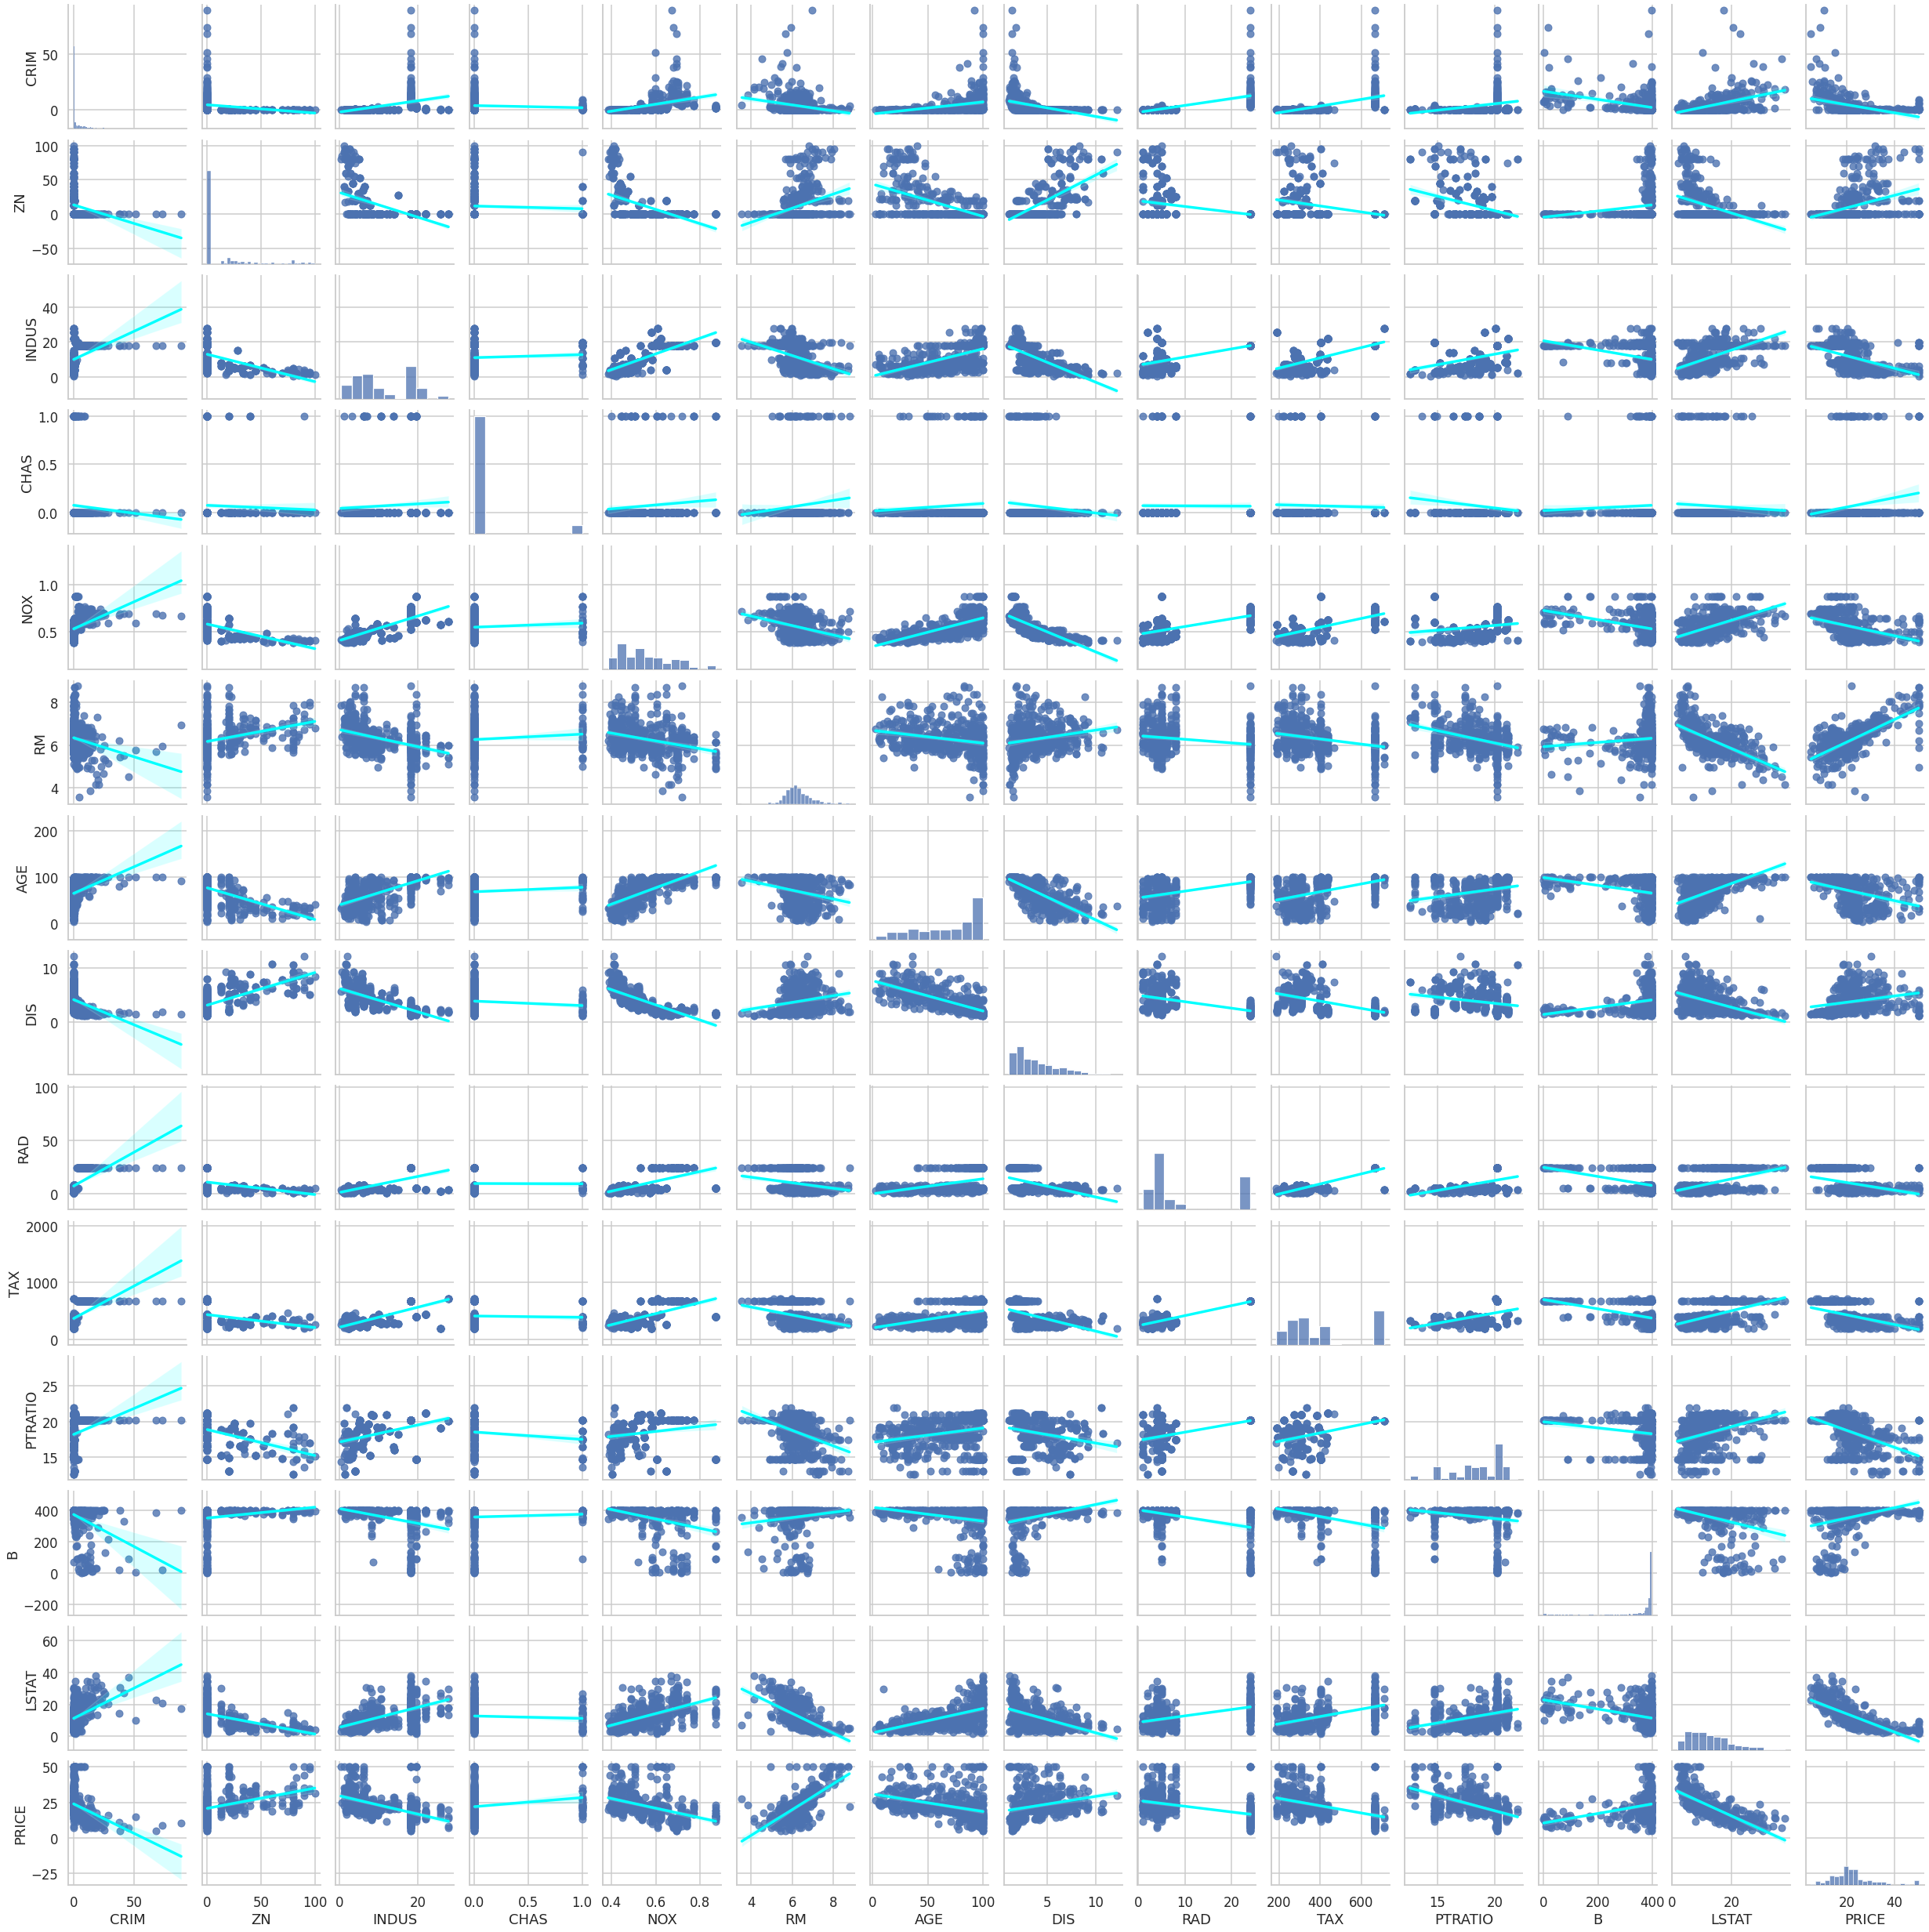

CPU times: user 33.2 s, sys: 418 ms, total: 33.6 s
Wall time: 33.1 s


In [34]:
%%time

sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()

### Training & Test Dataset Split

In [31]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

# Split. We use 20% of the data in test and 80% in training

In [32]:
# % of training set
len(X_train)/len(features)

0.7984189723320159

In [33]:
# % of test data set
X_test.shape[0]/features.shape[0]

0.2015810276679842

### Multivariable Regression

In [34]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115651
Intercept 36.533051382824596


coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

### Data Transformations
Thinking of a normal distribution it has very few occurrences in the tails. If a distribution has more data points in one of the tails, it is called a skewness. And if we look at the charts above, we can see that our house price distribution is skewed to the right. So, in order to improve our model, we need to transform the data.

In [35]:
# Looking the skew
data['PRICE'].skew()

1.1080984082549072

In a normal distribution skew=0. this means that the distribution is completely symmetrical. The right tail and the left tail are exactly the same size.
In this case skew=1.1 because the distribution are skewed to the left.

We will aply the log Transformation to our data. this change or affect the data more in the tails. we look for fitting the linear regression

np.log(...) transform all our entire series of prices in log prices.
We using np.log insted of log from math because is better for regression and for this kind of data 

In [36]:
# Logarithmic transformation
y_log = np.log(data['PRICE'])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [37]:
y_log.skew()
# The skew of -0.33 is much closer to 0 than a skew of 1.1 

-0.33032129530987864

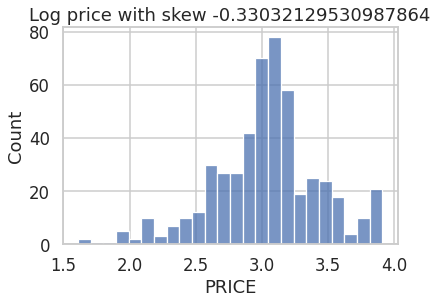

In [38]:
# Let's look at some charts
sns.histplot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

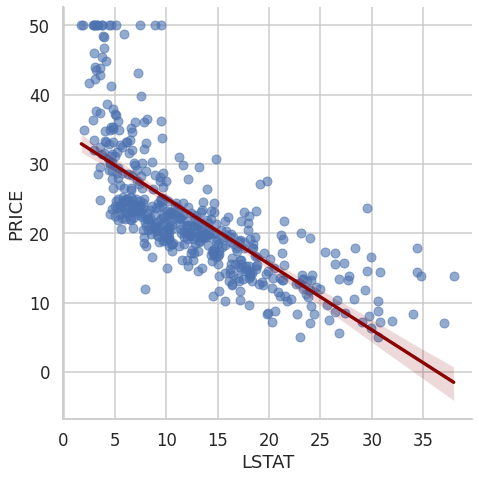

In [39]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, height=7, 
           scatter_kws={'alpha': 0.6}, line_kws={'color':'darkred'})
plt.show()

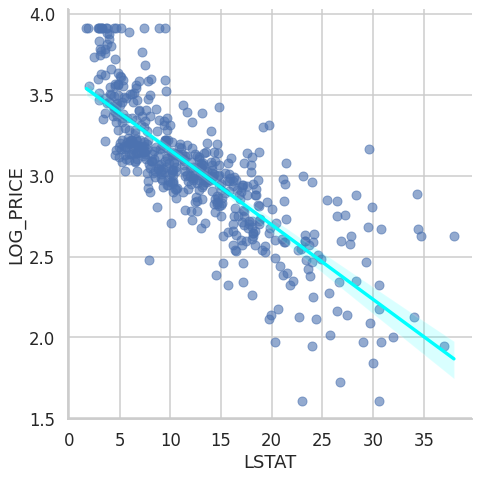

In [40]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, height=7, 
           scatter_kws={'alpha': 0.6}, line_kws={'color':'cyan'})
plt.show()

### Regression using log prices

In [41]:
prices = np.log(data['PRICE']) # Use log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260735
Intercept 4.059943871775192


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

We see that with a bit of data transformation we can appreciate a reduction of skew allowing us to improve our model, as a result we have a higher r-squared and a better fit

Checking the values

In [42]:
# Charles River Property Premium
np.e**0.080475

# The people are willing to pay approximately 1084 dollars more to live close to the river

1.0838017512597784

### p values & Evaluating Coefficients

A p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true. The lower the p-value, the greater the statistical significance of the observed difference.

In [43]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#results.params
#results.pvalues

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})


coef  p-value
const    4.059944    0.000
CRIM    -0.010672    0.000
ZN       0.001579    0.009
INDUS    0.002030    0.445
CHAS     0.080331    0.038
NOX     -0.704068    0.000
RM       0.073404    0.000
AGE      0.000763    0.209
DIS     -0.047633    0.000
RAD      0.014565    0.000
TAX     -0.000645    0.000
PTRATIO -0.034795    0.000
B        0.000516    0.000
LSTAT   -0.031390    0.000

A p-value of 0.05 or lower is considered statistically significant and any p value>0.05 are not significant.
In this case AGE and INDS are over to 0.05. This two features do not appear to add much additional information.
Al the others are indeed statistically significant

### Testing for Multicollinearity

$$ TAX = \alpha_0 + \alpha_1 RM + \alpha_2 NOX + ... + \alpha_{12}LSTAT $$

$$ VIF_{TAX} = \frac{1}{(1-R_{TAX}^2)} $$

VIF : Variance Inflation Factor

Multicollinearity is when two or more predictor variables in a regression are highly related to one another.
Consequences of Multicollinearity 
- Lost of reliability
- High variability in $ \theta_0 $
- The findings are strange or misleading or don't make sense.

In [44]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

1.7145250443932485

In [45]:
vif = [variance_inflation_factor(exog=X_incl_const.values, 
                                 exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns, 
             'vif': np.around(vif, 2)})

coef_name     vif
0      const  597.55
1       CRIM    1.71
2         ZN    2.33
3      INDUS    3.94
4       CHAS    1.08
5        NOX    4.41
6         RM    1.84
7        AGE    3.33
8        DIS    4.22
9        RAD    7.31
10       TAX    8.51
11   PTRATIO    1.84
12         B    1.34
13     LSTAT    2.81

We look for a threshold with which to compare our results.

Any feature that has a VIF > 10 would be considered problematic and would need closer inspection.

But looking at the list above, we can see that all the numbers are below 10 and this suggests that we don't have to worry about multicollinearity.

### Model Simplification & Baysian Information Criterion (BIC)

BIC is a way of measuring complexity. It is a number that allows you to compare two different models. A lower BIC number is considered to be better.


In [46]:
# Original model with log prices and all features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -139.74997769478898
r-squared is 0.7930234826697583


If we look at the p-values and remember that the threshold was 0.05, we can see that:
- INDUS - industry - has a p-value of around 0.44 meaning it is not statistically significant.
- AGE has a p-value of around 0.20 it is not statistically significant either.

In [47]:
# Reduced model #1 excluding INDUS
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -145.14508855591185
r-squared is 0.7927126289415163


In [48]:
# Reduced model #2 excluding INDUS and AGE
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -149.49934294224678
r-squared is 0.7918657661852815


In both cases r-squared is around of 0.79 and the BIC is lower. So even though we have removed one feature from our dataset, it hasn't really impacted our fit in a material way.
We can probably safely drop these two features simplifying our model.

In the next table we can see that all the values are very, very stable after to remove INDUS and AGE

In [49]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

coef  p-value      coef  p-value      coef  p-value
const    4.059944    0.000  4.056231    0.000  4.035922    0.000
CRIM    -0.010672    0.000 -0.010721    0.000 -0.010702    0.000
ZN       0.001579    0.009  0.001551    0.010  0.001461    0.014
INDUS    0.002030    0.445       NaN      NaN       NaN      NaN
CHAS     0.080331    0.038  0.082795    0.032  0.086449    0.025
NOX     -0.704068    0.000 -0.673365    0.000 -0.616448    0.000
RM       0.073404    0.000  0.071739    0.000  0.076133    0.000
AGE      0.000763    0.209  0.000766    0.207       NaN      NaN
DIS     -0.047633    0.000 -0.049394    0.000 -0.052692    0.000
RAD      0.014565    0.000  0.014014    0.000  0.013743    0.000
TAX     -0.000645    0.000 -0.000596    0.000 -0.000590    0.000
PTRATIO -0.034795    0.000 -0.034126    0.000 -0.033481    0.000
B        0.000516    0.000  0.000511    0.000  0.000518    0.000
LSTAT   -0.031390    0.000 -0.031262    0.000 -0.030271    0.000

### Residuals & Residual Plots

#### MODEL #1
Modified model: transformed (using log prices) & simplified (droping two features)

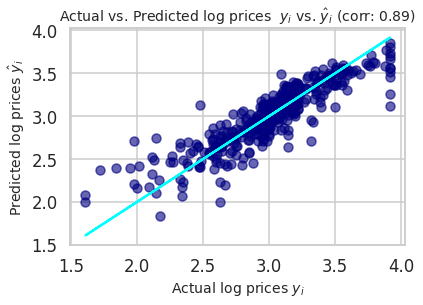

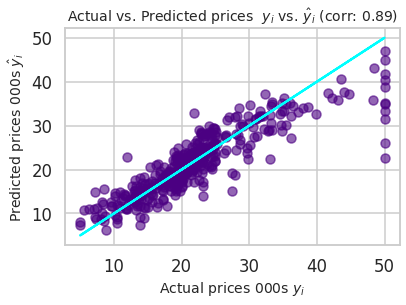

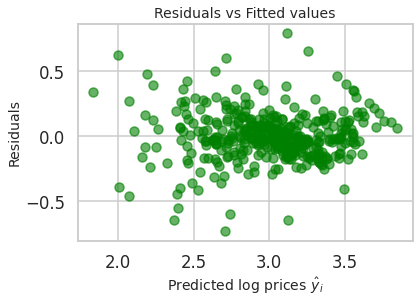

In [50]:
prices=np.log(data['PRICE']) #Use log prices
features=data.drop(['PRICE', 'INDUS', 'AGE'], axis=1) 

X_train, X_test, y_train, y_test=train_test_split(features, prices, 
                                                  test_size=0.2, random_state=10) 

# Using Statsmodel

X_incl_const=sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const)
results=model.fit()

#Residuals
#residuals=y_train - results.fittedvalues
#type(residuals)
#results.resid #is the same

#Graph of Actual vs. Predicted Prices

corr=round(y_train.corr(results.fittedvalues),2)

plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train,y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs. Predicted log prices  $y _i$ vs. $\hat y _i$ (corr: {corr})', fontsize=14)

plt.show()

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(np.e**y_train,np.e**y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs. Predicted prices  $y _i$ vs. $\hat y _i$ (corr: {corr})', fontsize=14)

plt.show()

#Residuals vs Predicted values

plt.scatter(x=results.fittedvalues, y=results.resid, c='green', alpha=0.6)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted values', fontsize=14)

plt.show()

#Mean squared error & R-squared
reduced_log_mse=round(results.mse_resid,3)
reduced_log_rsquared=round(results.rsquared,3)

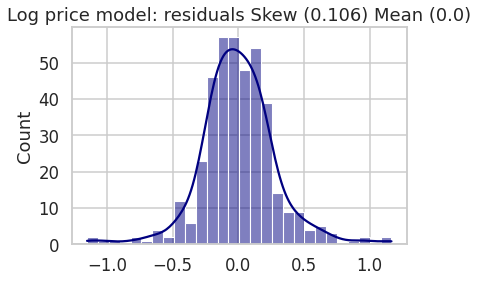

In [58]:
# Distribution of Residuals (log prices) - Checking for normality

resid_mean=round(results.resid.mean(),3)
resid_skew=round(results.resid.skew(),3)

sns.histplot(results.resid, color='navy',kde=True)
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

#### MODEL #2
Original model, normal prices & all features

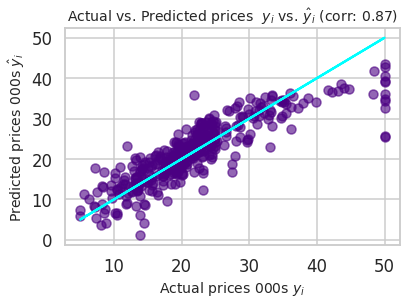

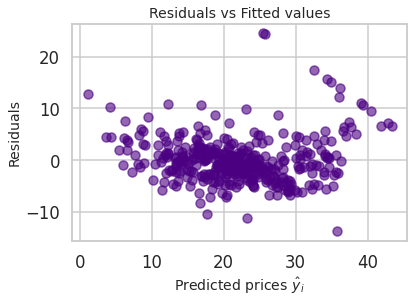

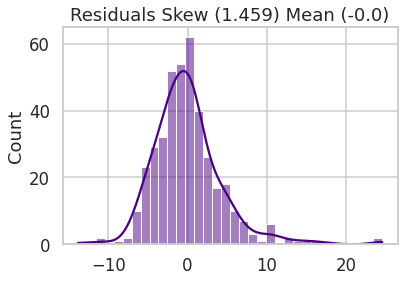

In [61]:
prices=data['PRICE']
features=data.drop('PRICE', axis=1) 

X_train, X_test, y_train, y_test=train_test_split(features, prices, 
                                                  test_size=0.2, random_state=10) #test_size=0.2 means that our test data set is going to be 20% of the total

X_incl_const=sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const)
results=model.fit()


corr=round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(y_train,y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs. Predicted prices  $y _i$ vs. $\hat y _i$ (corr: {corr})', fontsize=14)

plt.show()


#Residuals vs Predicted values

plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted values', fontsize=14)

plt.show()

# Residuals Distribution chart

resid_mean=round(results.resid.mean(),3)
resid_skew=round(results.resid.skew(),3)

sns.histplot(results.resid, color='indigo', kde=True)
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()


#Mean squared error & R-squared
full_normal_mse=round(results.mse_resid,3)
full_normal_rsquared=round(results.rsquared,3)

#### MODEL #3
Model Omitting key features using log prices 

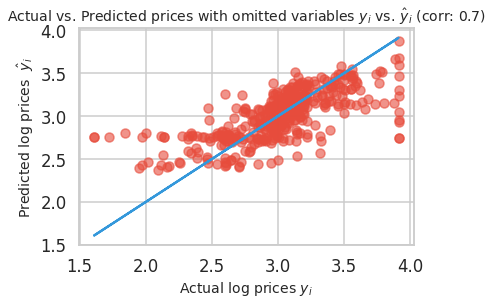

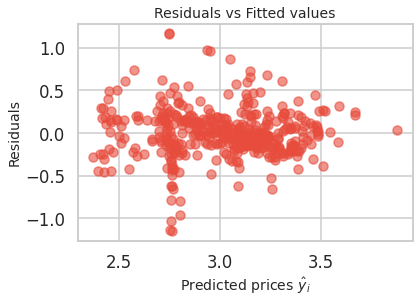

In [53]:
prices=np.log(data['PRICE'])
features=data.drop(['PRICE', 'INDUS', 'LSTAT', 'RM', 'NOX', 'CRIM' ], axis=1) 

X_train, X_test, y_train, y_test=train_test_split(features, prices, 
                                                  test_size=0.2, random_state=10) #test_size=0.2 means that our test data set is going to be 20% of the total

X_incl_const=sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const)
results=model.fit()


corr=round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train, y=results.fittedvalues, c='#e74c3c', alpha=0.6)
plt.plot(y_train,y_train, color='#3498db')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices  $\hat y _i$', fontsize=14)
plt.title(f'Actual vs. Predicted prices with omitted variables $y _i$ vs. $\hat y _i$ (corr: {corr})', fontsize=14)

plt.show()


#Residuals vs Predicted values

plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted values', fontsize=14)

plt.show()

#Mean squared error & R-squared
omitted_var_mse=round(results.mse_resid,3)
omitted_var_rsquared=round(results.rsquared,3)

Looking at the differences between the three models

In [54]:
pd.DataFrame({'R-Squared':[reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared], 
             'MSE':[reduced_log_mse, full_normal_mse, omitted_var_mse],
             'RMSE':np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])},
            index=['Reduced Log Model', 'Full Normal Price Model', 'Omitted Variable Model'])

# RMSE square root of MSE. 
# MSE have the units of the target. 
# Pay attention to the data scales (log or normal)

R-Squared     MSE      RMSE
Reduced Log Model            0.792   0.035  0.187083
Full Normal Price Model      0.750  19.921  4.463295
Omitted Variable Model       0.495   0.084  0.289828

### Results
It is useful when showing the prices of the houses we must show a price range.

We will estimate the bound for a house value in $30.000 for 95% prediction

Since we consider that it is a normal distribution, we can say that 95% of the data are between the mean and two standard deviation (variation around the mean). In our case we ned to see the distribution of the residuals: y hat +- 2*rmse

In [55]:
rmse_1=np.sqrt(reduced_log_mse)
rmse_2=2*np.sqrt(reduced_log_mse)

# y hat +- 2*rmse

upper_bound_log= np.log(30)+rmse_2
lower_bound_log= np.log(30)-rmse_2

# the result is in 000s dollars
upper_bound_normal=np.e**(upper_bound_log)
lower_bound_normal=np.e**(lower_bound_log)

print('The lower bound in normal prices is $',round(lower_bound_normal*1000,2))
print('The upper bound in normal prices is $',round(upper_bound_normal*1000,2))

The lower bound in normal prices is $ 20635.89
The upper bound in normal prices is $ 43613.34
